In [18]:
import pandas as pd

In [19]:
# Load the dataset
dataset_path = r"C:\Users\kjson\Desktop\vehicle.csv"
df = pd.read_csv(dataset_path)

In [20]:
# Display the first few rows of the dataset
print(df.head())

   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0            

In [21]:
# Get the number of columns
num_columns = df.shape[1]

print(f"Number of columns: {num_columns}")

Number of columns: 19


In [22]:
# Count the number of missing values in each column
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [23]:
# Separate the target variable from the features
target_column = 'class'  
features = df.drop(columns=[target_column])
target = df[target_column]

In [24]:
for column in features:
    if df[column].dtype == 'object':  # Categorical columns
        most_frequent_value = df[column].mode()[0]
        df[column].fillna(most_frequent_value, inplace=True)
    else:  # Numeric columns
        average_value = df[column].mean()
        df[column].fillna(average_value, inplace=True)

In [25]:
# Count the number of missing values in each column
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Separate the target variable from the features
target_column = 'class'  
features = df.drop(columns=[target_column])
target = df[target_column]
X = features
y = target

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
train_accuracies = {}
test_accuracies = {}

for model_name, model in models.items():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies[model_name] = train_accuracy
    
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies[model_name] = test_accuracy
    
for model_name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Parameters for {model_name}:")
    print(model.get_params())
    print("="*50)
    
    # Print the accuracies
print("Train Accuracies:")
for model_name, train_accuracy in train_accuracies.items():
    print(f"{model_name}: {train_accuracy:.2f}")

print("\nTest Accuracies:")
for model_name, test_accuracy in test_accuracies.items():
    print(f"{model_name}: {test_accuracy:.2f}")


c:\Users\kjson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Parameters for Logistic Regression:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Parameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Parameters for Naive Bayes:
{'priors': None, 'var_smoothing': 1e-09}
Parameters for K-Nearest Neighbors:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Train Accu

c:\Users\kjson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

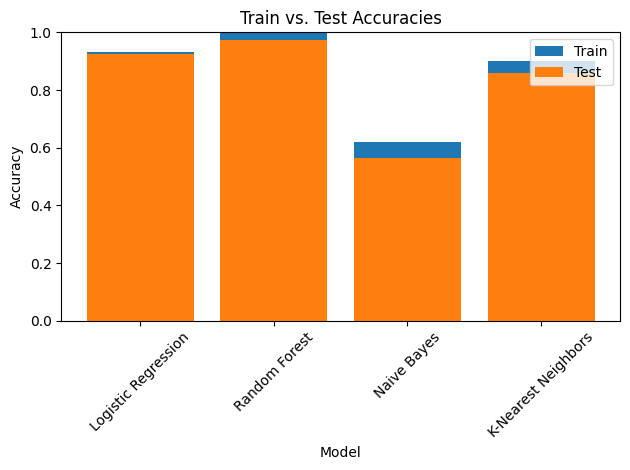

In [31]:
# Create a bar chart to visualize train and test accuracies
plt.bar(train_accuracies.keys(), train_accuracies.values(), label='Train')
plt.bar(test_accuracies.keys(), test_accuracies.values(), label='Test')
plt.title("Train vs. Test Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\kjson\AppData\Local\Temp\ipykernel_8020\3246823827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                             compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr.axis_aspect_ratio            0.091704     0.153362              0.158397   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance.1               0.815901     0.83852

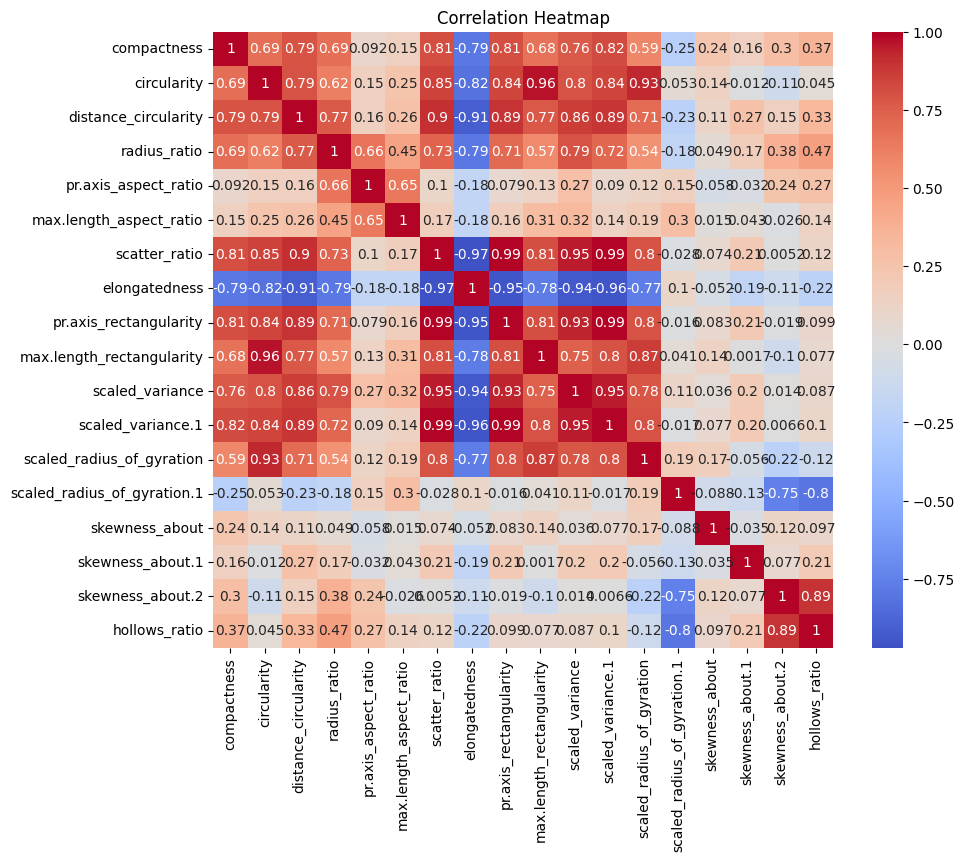

In [39]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # Use f_regression for regression tasks

# Select top k features based on ANOVA F-value
k = 15  # Replace with the number of features you want to select
selector = SelectKBest(score_func=f_classif, k=k)  # Use f_regression for regression tasks
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Print the indices of selected features
print("Indices of selected features:", selected_indices)


Indices of selected features: [ 0  1  2  3  5  6  7  8 10 11 12 13 14 15 17]


In [44]:
selected_features_df = X.iloc[:, selected_indices]

In [45]:
selected_features_df.to_csv('selected_features.csv', index=False)